In [1]:
import pandas as pd

In [2]:
import allel 

In [30]:
founder_ecotype_names = pd.read_csv('key_files/founder_ecotype_names.csv')['0']

In [3]:
tsf = allel.read_vcf('key_files/subset_TSF.recode.vcf')

pheno = pd.read_csv('key_files/atlas_phenotype_matrix_withid.csv')

pheno['FT10'].notna().sum()

pheno['FT16'].notna().sum()

1021

In [51]:
# Extract genotypes for SNP 4_10999396
genotype_data = tsf['calldata/GT']  # Assuming GT field contains genotype information
snp_index = list(tsf['variants/ID']).index('4_10999396')  # Find the SNP position

# Get genotypes for the specific SNP
genotypes = genotype_data[:, snp_index, :]

In [52]:
allele_counts = genotype_data.sum(axis=2)

In [53]:
allele_counts = allele_counts.T

In [54]:
# Convert to DataFrame
df = pd.DataFrame(allele_counts, columns=tsf['variants/ID'])

In [55]:
df['id'] = founder_ecotype_names

In [56]:
x4 = df[['4_10999396', 'id']]

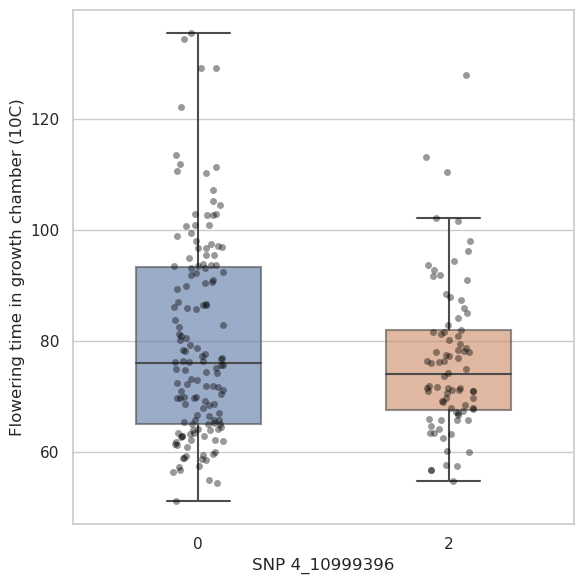

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create the boxplot with jittered dots
plt.figure(figsize=(6, 6))
sns.boxplot(x='4_10999396', y='FT10', data=merged_df, showcaps=True, fliersize=0, width=0.5, boxprops=dict(alpha=0.6))
sns.stripplot(x='4_10999396', y='FT10', data=merged_df, jitter=True, alpha=0.4, color='black', edgecolor=None)

# Label axes
plt.xlabel("SNP 4_10999396")
plt.ylabel("Flowering time in growth chamber (10C)")

plt.tight_layout()
plt.show()


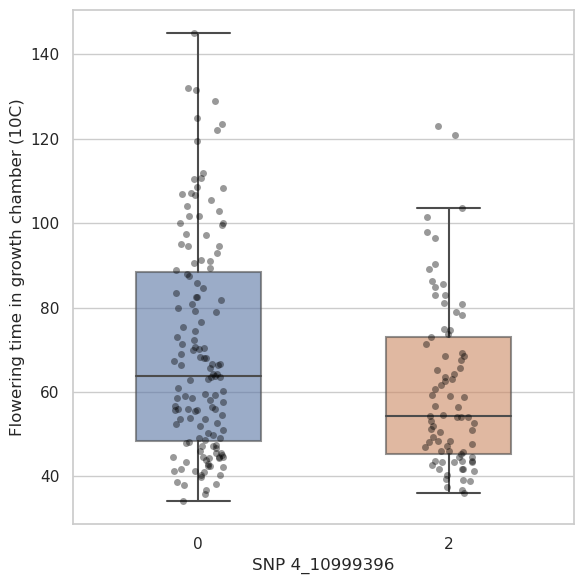

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create the boxplot with jittered dots
plt.figure(figsize=(6, 6))
sns.boxplot(x='4_10999396', y='FT16', data=merged_df, showcaps=True, fliersize=0, width=0.5, boxprops=dict(alpha=0.6))
sns.stripplot(x='4_10999396', y='FT16', data=merged_df, jitter=True, alpha=0.4, color='black', edgecolor=None)

# Label axes
plt.xlabel("SNP 4_10999396")
plt.ylabel("Flowering time in growth chamber (10C)")

plt.tight_layout()
plt.show()


In [65]:
merged_df[['4_10999396', 'FT16']].dropna()

,4_10999396,FT16
0,0,42.50
1,0,131.50
2,2,65.25
3,0,100.00
4,0,132.00
...,...,...
221,0,125.00
222,0,56.00
223,0,80.00
224,0,94.50


In [58]:
merged_df = pd.merge(pheno, x4, on='id')

In [60]:
merged_df.columns

Index(['id', 'name', 'country', 'latitude', 'longitude', 'cs_number', 'RegMap',
       'G1001', 'FT10', 'FT16',
       ...
       'projected_leaf_area_day_8', 'r', 'Relative_Water_Content_24',
       'Water_Content_24', 'drought_index', 'Survival_insitu_Madrid',
       'Survival_insitu_Tubingen', 'Pi_uptake_under_Pi_deficient_conditions',
       'Pi_uptake_under_Pi_sufficient_conditions', '4_10999396'],
      dtype='object', length=1872)